**Autor** : Jeferson Magalhães dos Santos

**e-mail**: jefersonmdossantos@gmail.com
    
**github**: jefersonmglh

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [1. Importação de pacotes e dados](#import)
* [2. Análise preliminar](#visualizacao)
* [3. Tratamento e Análise Exploratória](#tratamento)
* [4. Correlação e Associação](#corr)
* [5. Treinamento do modelo de aprendizado](#modelo)
* [6. Avaliação do modelo](#avaliacao)
* [7. Aprimoramento do modelo](#aprimoramento)
* [8. Conclusão](#conclusao)

#  <a name="resumo"> RESUMO </a>
[Voltar ao índice](#indice)

""

#  <a name="import">1. Importação de pacotes e dados </a>
[Voltar ao índice](#indice)

In [1]:
#basic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#graph
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import chart_studio.plotly as cplt
import plotly.graph_objs as go

# model&metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, classification_report, accuracy_score, f1_score, confusion_matrix
from scipy.stats import chi2, chi2_contingency, iqr, pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier




In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
compose = [df_train, df_test]
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#  <a name="visualizacao">2. Análise preliminar</a>
[Voltar ao índice](#indice)

In [3]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
    
show_info(df_train)

DATASET SHAPE:  (891, 12) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

PassengerId    891
Survived         2
Pclass    

In [4]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
    
show_info(df_test)

DATASET SHAPE:  (418, 11) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

PassengerId    418
Pclass           3
Name           418
Sex              2
Age           

* eliminando variáveis que não serão usadas

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
quali_columns = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Name', 'Embarked', 'Ticket','Cabin']
df_train_quali = df_train[quali_columns]
df_train_quali

,Survived,Pclass,SibSp,Parch,Sex,Name,Embarked,Ticket,Cabin
0,0,3,1,0,male,"Braund, Mr. Owen Harris",S,A/5 21171,NaN
1,1,1,1,0,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C,PC 17599,C85
2,1,3,0,0,female,"Heikkinen, Miss. Laina",S,STON/O2. 3101282,NaN
3,1,1,1,0,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S,113803,C123
4,0,3,0,0,male,"Allen, Mr. William Henry",S,373450,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,male,"Montvila, Rev. Juozas",S,211536,NaN
887,1,1,0,0,female,"Graham, Miss. Margaret Edith",S,112053,B42
888,0,3,1,2,female,"Johnston, Miss. Catherine Helen ""Carrie""",S,W./C. 6607,NaN
889,1,1,0,0,male,"Behr, Mr. Karl Howell",C,111369,C148


In [7]:
for var_quali in df_train_quali:
    print(df_train_quali[var_quali].value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6

In [8]:
quanti_columns = ['Age', 'Fare']
df_train_quanti = df_train[quanti_columns]
df_train_quanti

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


Age


<AxesSubplot:>

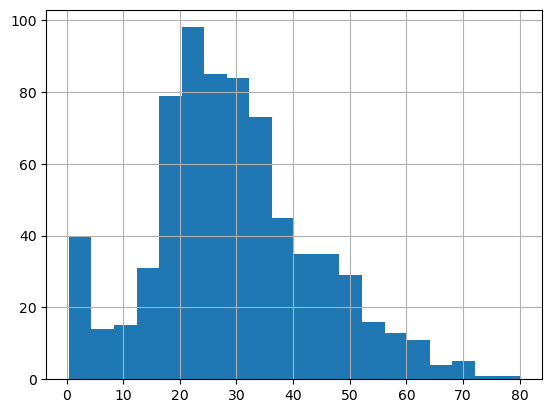

In [9]:
print('Age')
df_train_quanti['Age'].hist(bins=20)

Fare


<AxesSubplot:>

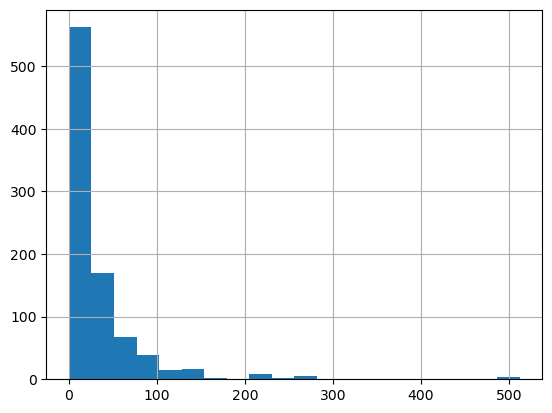

In [10]:
print('Fare')
df_train_quanti['Fare'].hist(bins=20)

missing values train set


<AxesSubplot:>

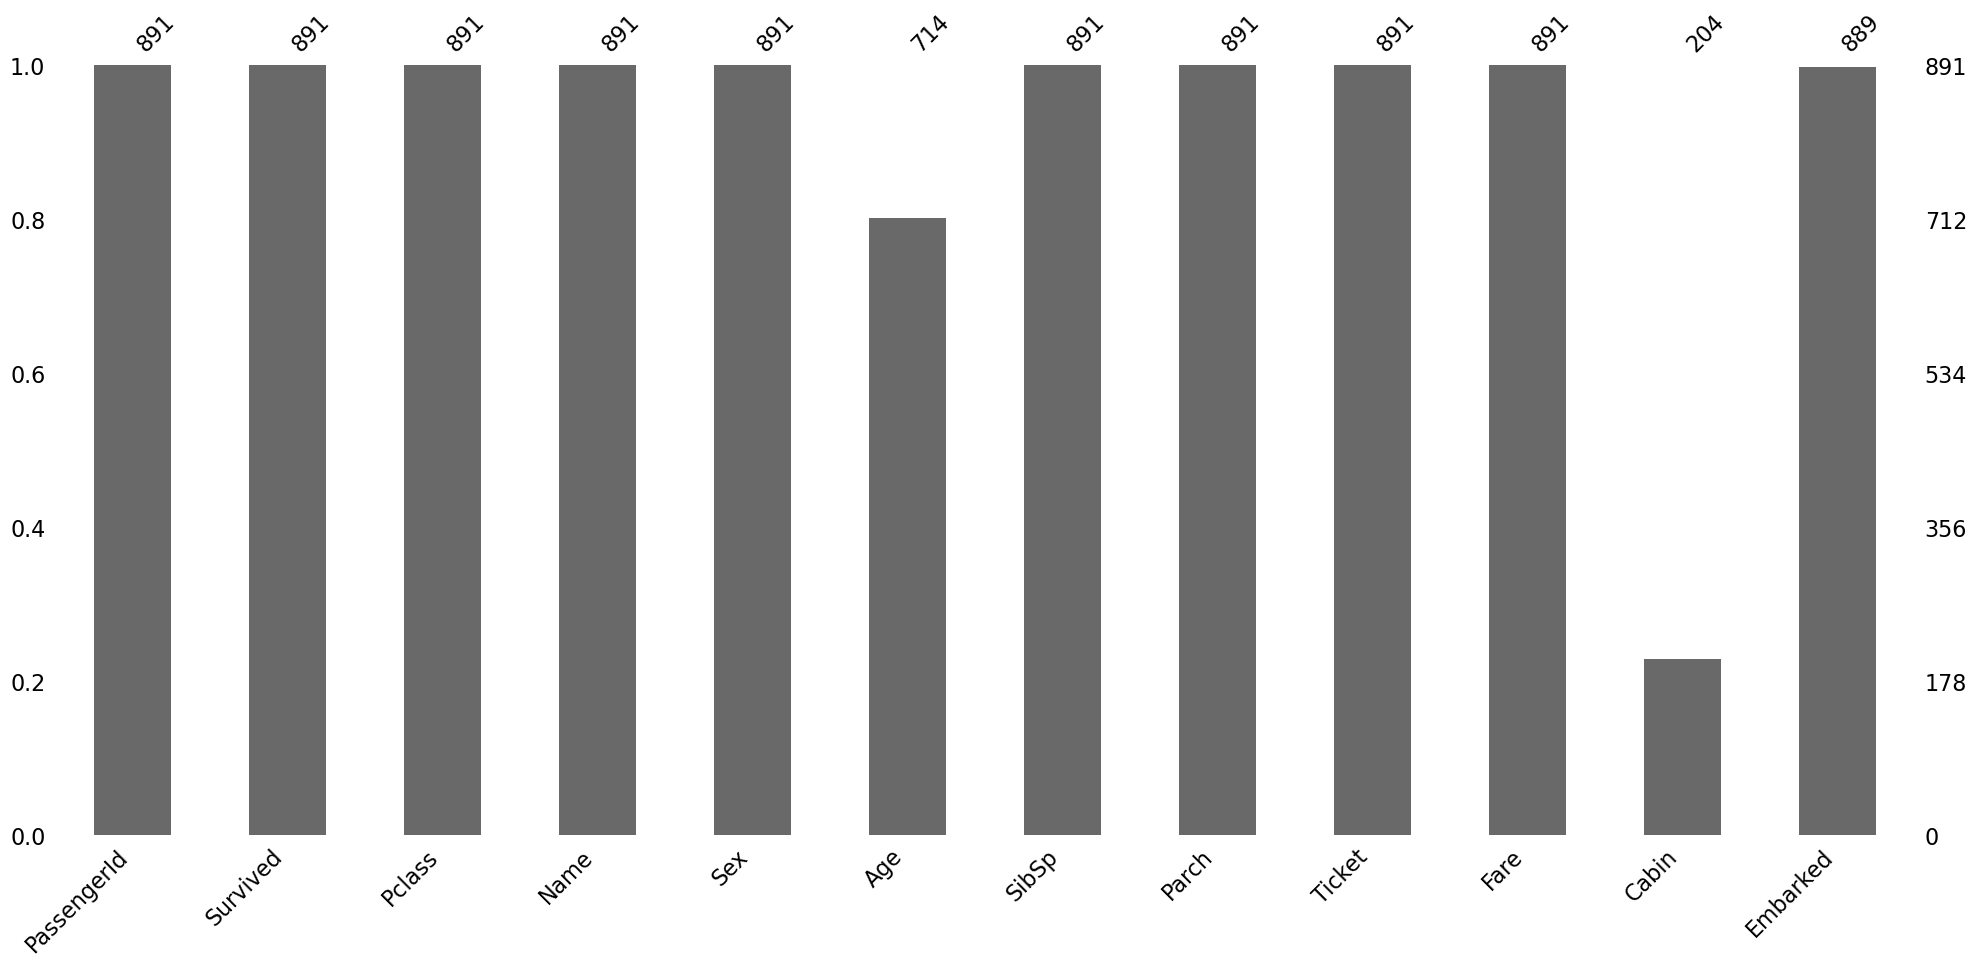

In [11]:
print('missing values train set')
msno.bar(df_train)

missing values test set


<AxesSubplot:>

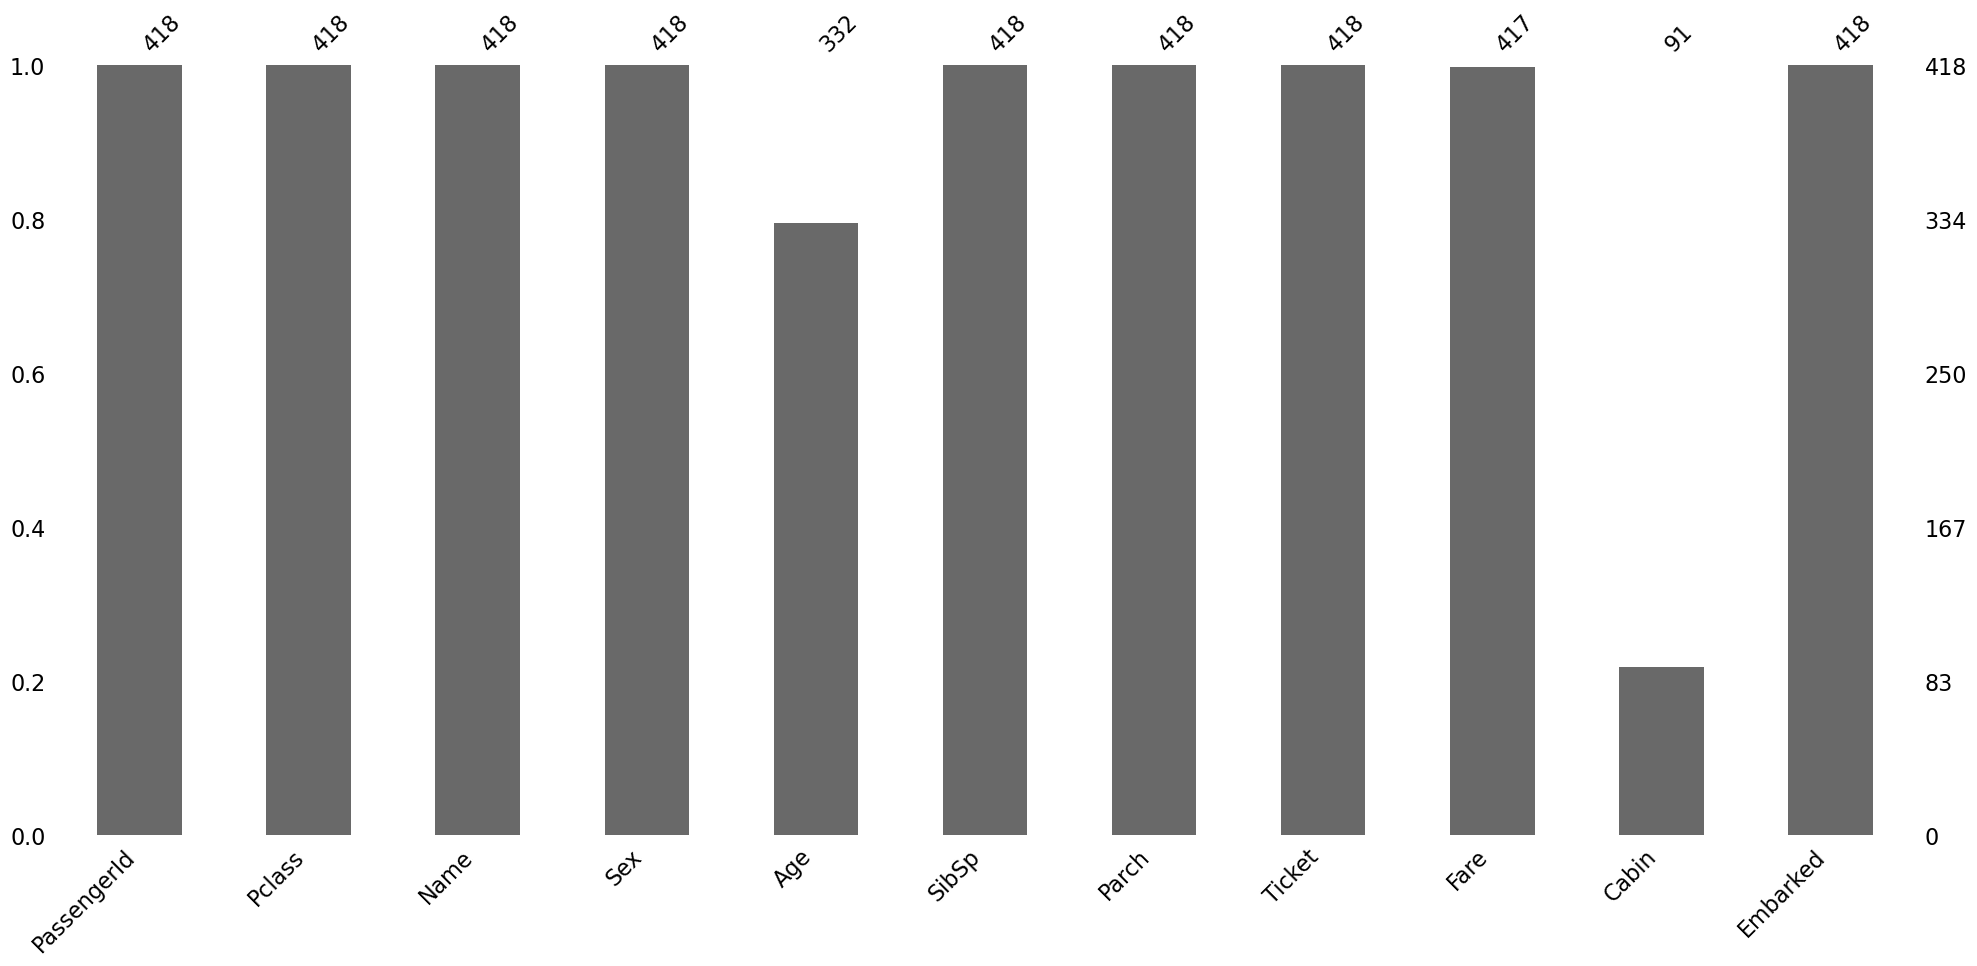

In [12]:
print('missing values test set')
msno.bar(df_test)

#  <a name="tratamento">3. Tratamento e Análise Exploratória</a>
[Voltar ao índice](#indice)

* Eliminando variáveis que não serão utilizadas

In [13]:
for df in compose:
    df.drop(columns=['Cabin', 'Ticket','Name'], inplace= True)

In [14]:
#para o train set não é necessário 'passengerId'

df_train.drop(columns=['PassengerId'], inplace = True)

* preenchendo null valores

In [15]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [16]:
import random
age_mean = df_train['Age'].mean()
age_std = df_train['Age'].std()
df_train['Age'] = df_train['Age'].fillna(random.uniform(age_mean - age_std, age_mean + age_std))

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [18]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [19]:
import random
age_mean = df_test['Age'].mean()
age_std = df_test['Age'].std()
df_test['Age'] = df_test['Age'].fillna(random.uniform(age_mean - age_std, age_mean + age_std))

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


* categorizando variáveis qualitativas

In [21]:
sex = {'male': '0', 'female': '1'}
for df in compose:
    df['Female_True'] = df['Sex'].replace(sex).astype('int64')
    df.drop(columns=['Sex'], inplace = True)

In [22]:
embarked_ = {
    'S': 2,
    'C': 1,
    'Q': 0
}

for df in compose:
    df['Embarked_Dum'] = df['Embarked'].replace(embarked_).astype('int64')
    df.drop(columns=['Embarked'], inplace = True)

In [23]:
for df in compose:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Female_True   891 non-null    int64  
 7   Embarked_Dum  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   

* UniVar

In [24]:
quali_columns

['Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'Sex',
 'Name',
 'Embarked',
 'Ticket',
 'Cabin']

Survived


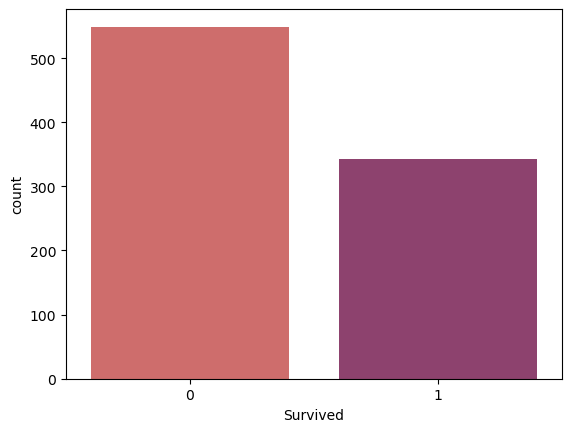

Pclass


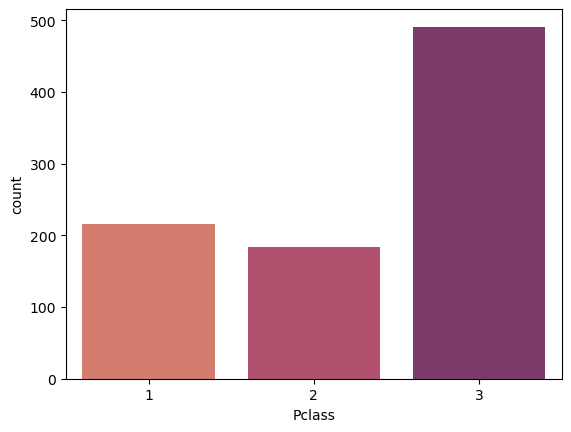

SibSp


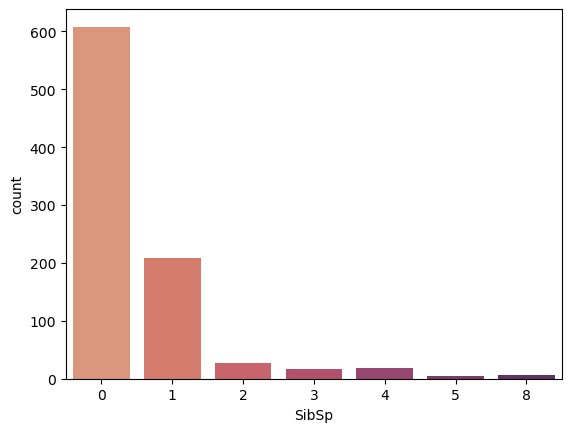

Parch


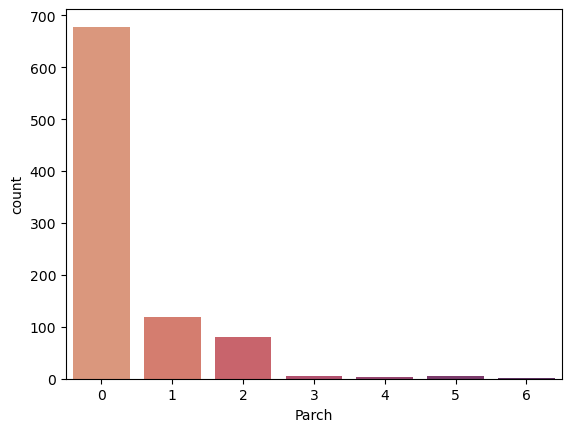

Female_True


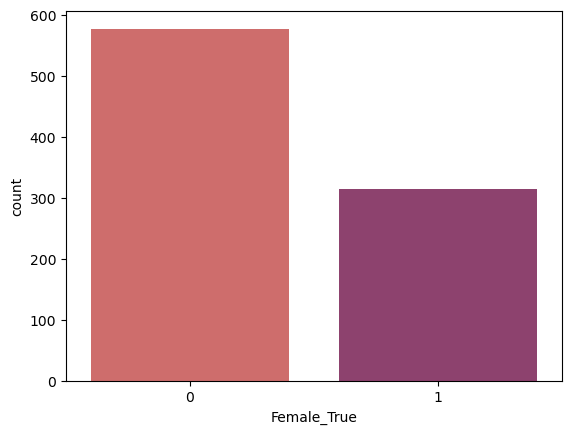

Embarked_Dum


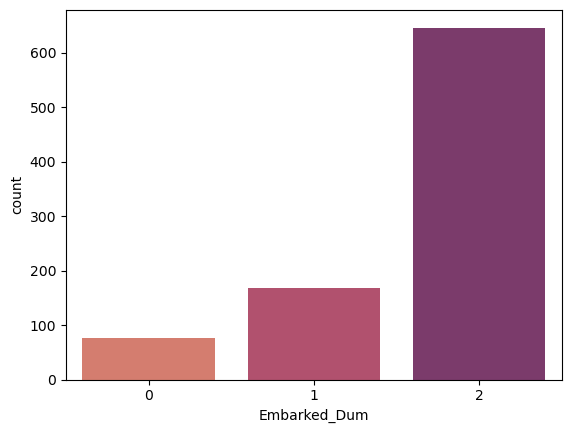

In [25]:
quali_columns = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Female_True', 'Embarked_Dum']
for var_quali in quali_columns:
    print(var_quali)
    sns.countplot(x = df_train[var_quali], palette='flare')
    plt.show()


Age


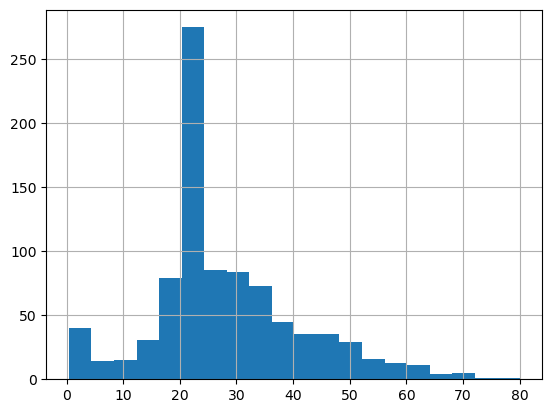

Fare


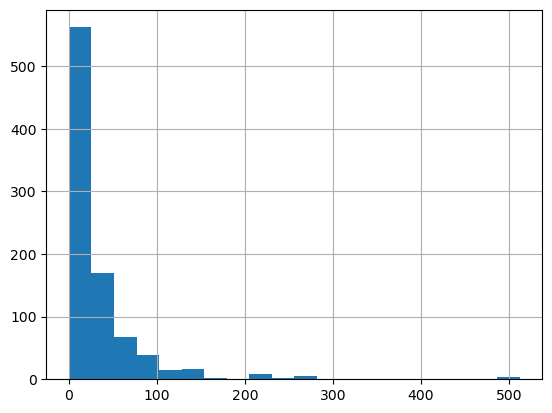

In [26]:
quanti_columns = ['Age', 'Fare']
for var_quanti in quanti_columns:
    print(var_quanti)
    df_train[var_quanti].hist(bins=20)
    plt.show()

* Bivar

<AxesSubplot:xlabel='Embarked_Dum', ylabel='count'>

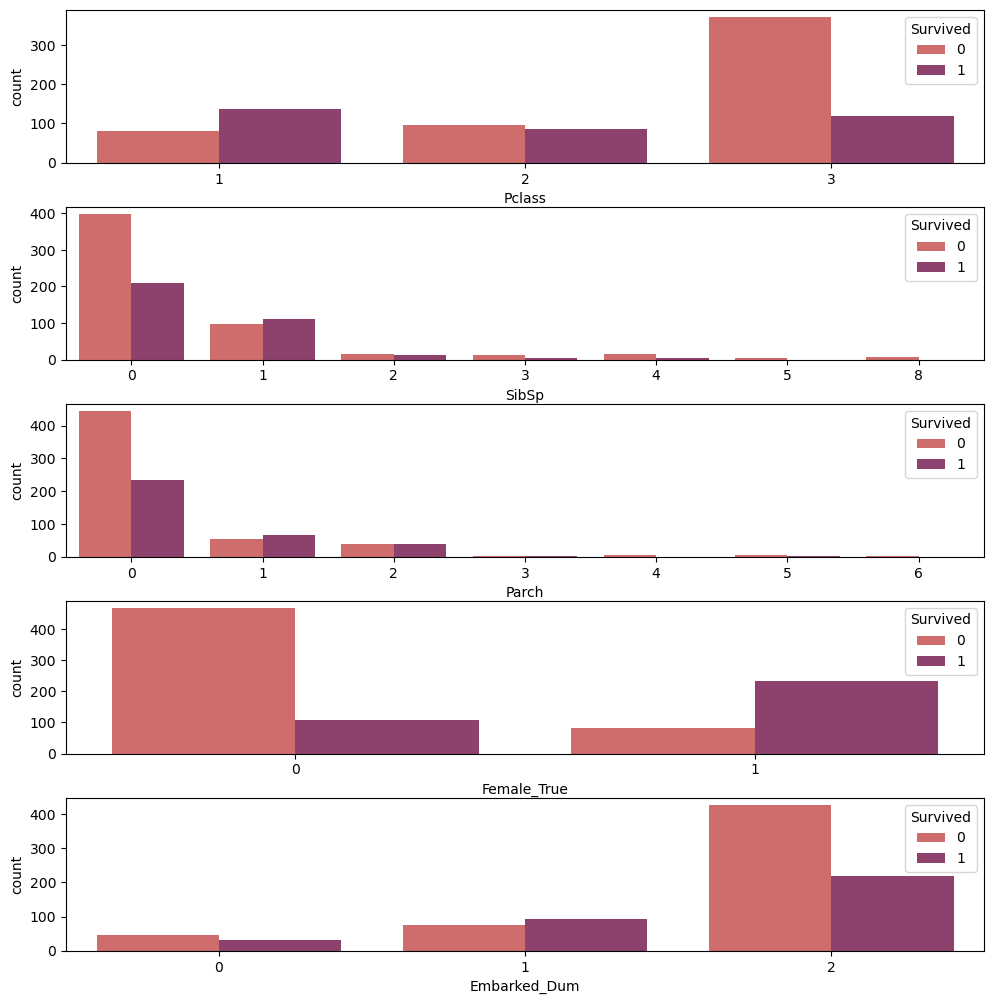

In [27]:
fig, ax = plt.subplots(5,1,figsize=(10,10))
plt.tight_layout()

sns.countplot(x = df_train['Pclass'], hue=df_train['Survived'], ax=ax[0], palette='flare')
sns.countplot(x = df_train['SibSp'], hue=df_train['Survived'], ax=ax[1], palette='flare')
sns.countplot(x = df_train['Parch'], hue=df_train['Survived'], ax=ax[2], palette='flare')
sns.countplot(x = df_train['Female_True'], hue=df_train['Survived'], ax=ax[3], palette='flare')
sns.countplot(x = df_train['Embarked_Dum'], hue=df_train['Survived'], ax=ax[4], palette='flare')

Age


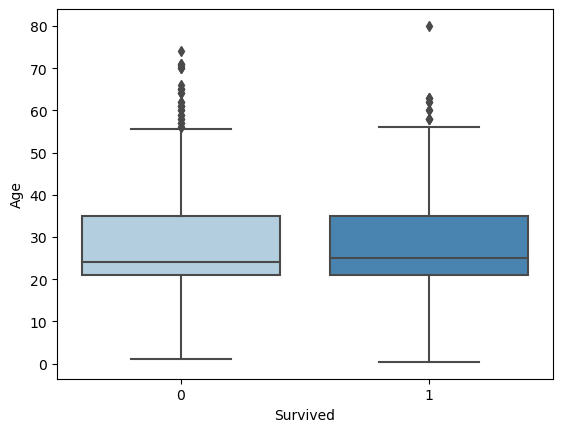

Fare


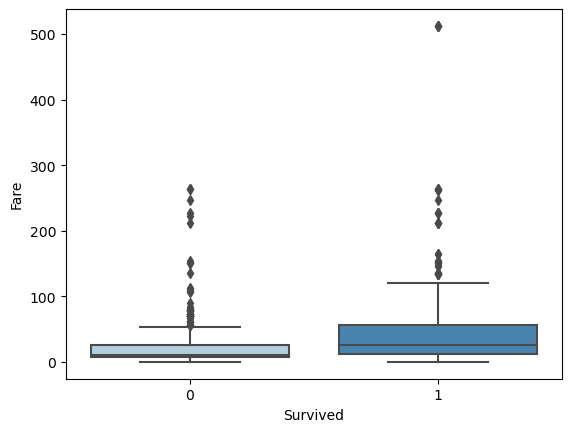

In [28]:
for var_quanti in quanti_columns:
    print(var_quanti)
    sns.boxplot(y=df_train[var_quanti], x='Survived', data=df_train, palette='Blues')
    plt.show()

#  <a name="corr">4. Correlação e associação</a>
[Voltar ao índice](#indice)

* pearson corr

In [29]:
corr_quanti = pearsonr(df_train['Age'], df_train['Fare'])
corr_quanti

PearsonRResult(statistic=0.114405362285124, pvalue=0.0006229908763143554)

In [30]:
corr = pearsonr(df_train['Age'], df_train['Survived'])
corr

PearsonRResult(statistic=-0.04372117257979624, pvalue=0.19228406745203383)

In [31]:
corr = pearsonr(df_train['Fare'], df_train['Survived'])
corr

PearsonRResult(statistic=0.2573065223849637, pvalue=6.120189341916209e-15)

<AxesSubplot:title={'center':'Correlação entre as variáveis'}>

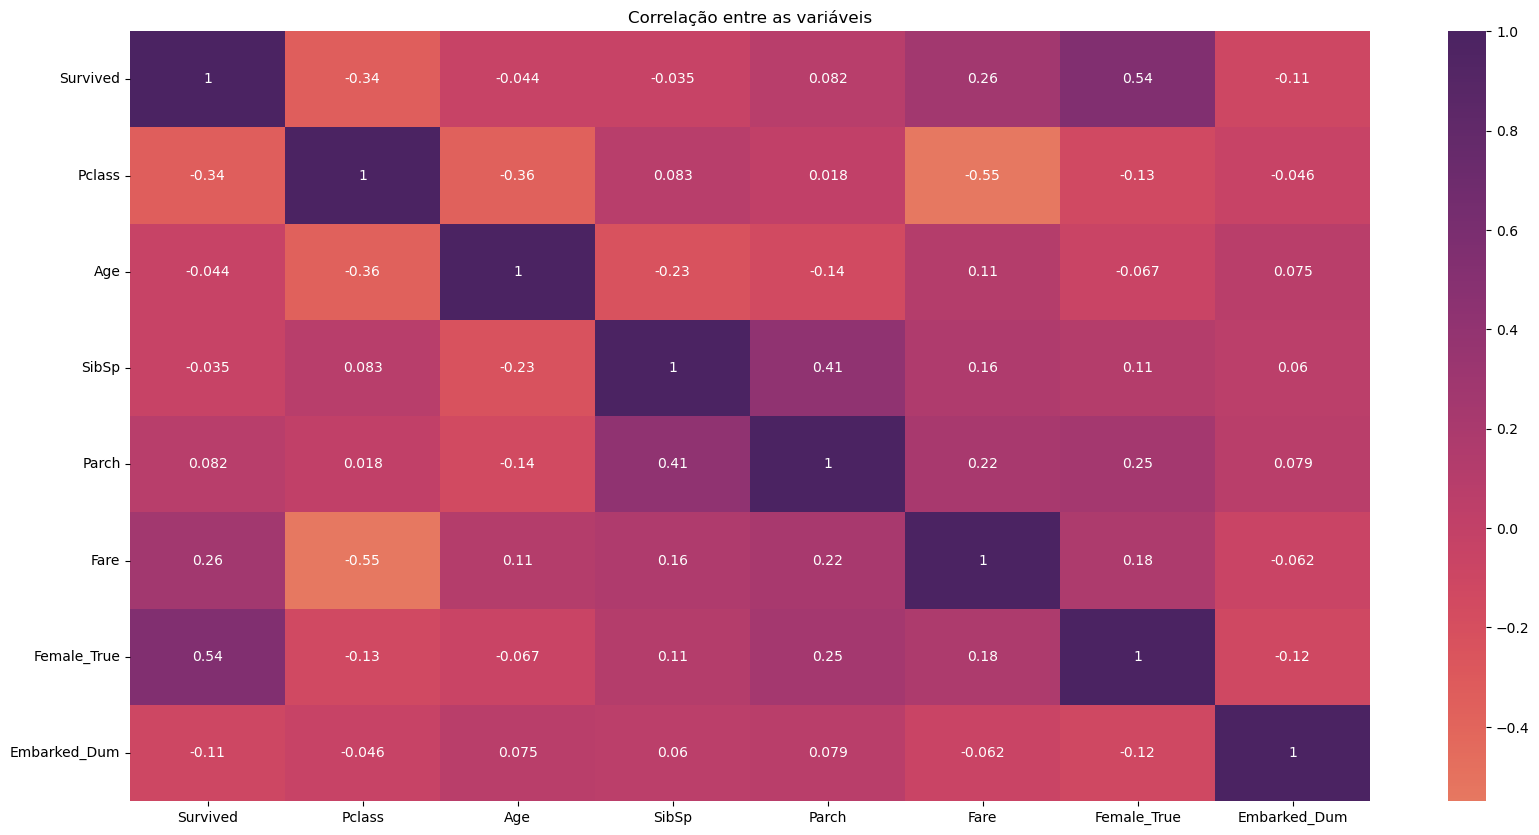

In [32]:
plt.figure(figsize=(20,10))
plt.title('Correlação entre as variáveis')
sns.heatmap(df_train.corr(),cmap='flare', center=0, annot=True)

* corr entre quali

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Female_True   891 non-null    int64  
 7   Embarked_Dum  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [34]:
pclass = pd.crosstab(df_train['Survived'], df_train['Pclass'])


stat, p, dof, expected = chi2_contingency(pclass)

prob = 0.95

critical = chi2.ppf(prob, dof)

if abs(stat) >= critical:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

alpha = 1.0 - prob

print('significancia=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0


In [35]:
sibsp = pd.crosstab(df_train['Survived'], df_train['SibSp'])


stat, p, dof, expected = chi2_contingency(sibsp)

prob = 0.95

critical = chi2.ppf(prob, dof)

if abs(stat) >= critical:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

alpha = 1.0 - prob

print('significancia=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0


In [36]:
parch = pd.crosstab(df_train['Survived'], df_train['Parch'])


stat, p, dof, expected = chi2_contingency(parch)

prob = 0.95

critical = chi2.ppf(prob, dof)

if abs(stat) >= critical:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

alpha = 1.0 - prob

print('significancia=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0


In [37]:
fem = pd.crosstab(df_train['Survived'], df_train['Female_True'])


stat, p, dof, expected = chi2_contingency(fem)

prob = 0.95

critical = chi2.ppf(prob, dof)

if abs(stat) >= critical:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

alpha = 1.0 - prob

print('significancia=%.3f, p=%.3f' % (alpha, p))

if p <= alpha:
	print('Rejeitar H0')
else:
	print('Não se pode rejeitar H0')

Rejeitar H0
significancia=0.050, p=0.000
Rejeitar H0


<Figure size 1500x700 with 0 Axes>

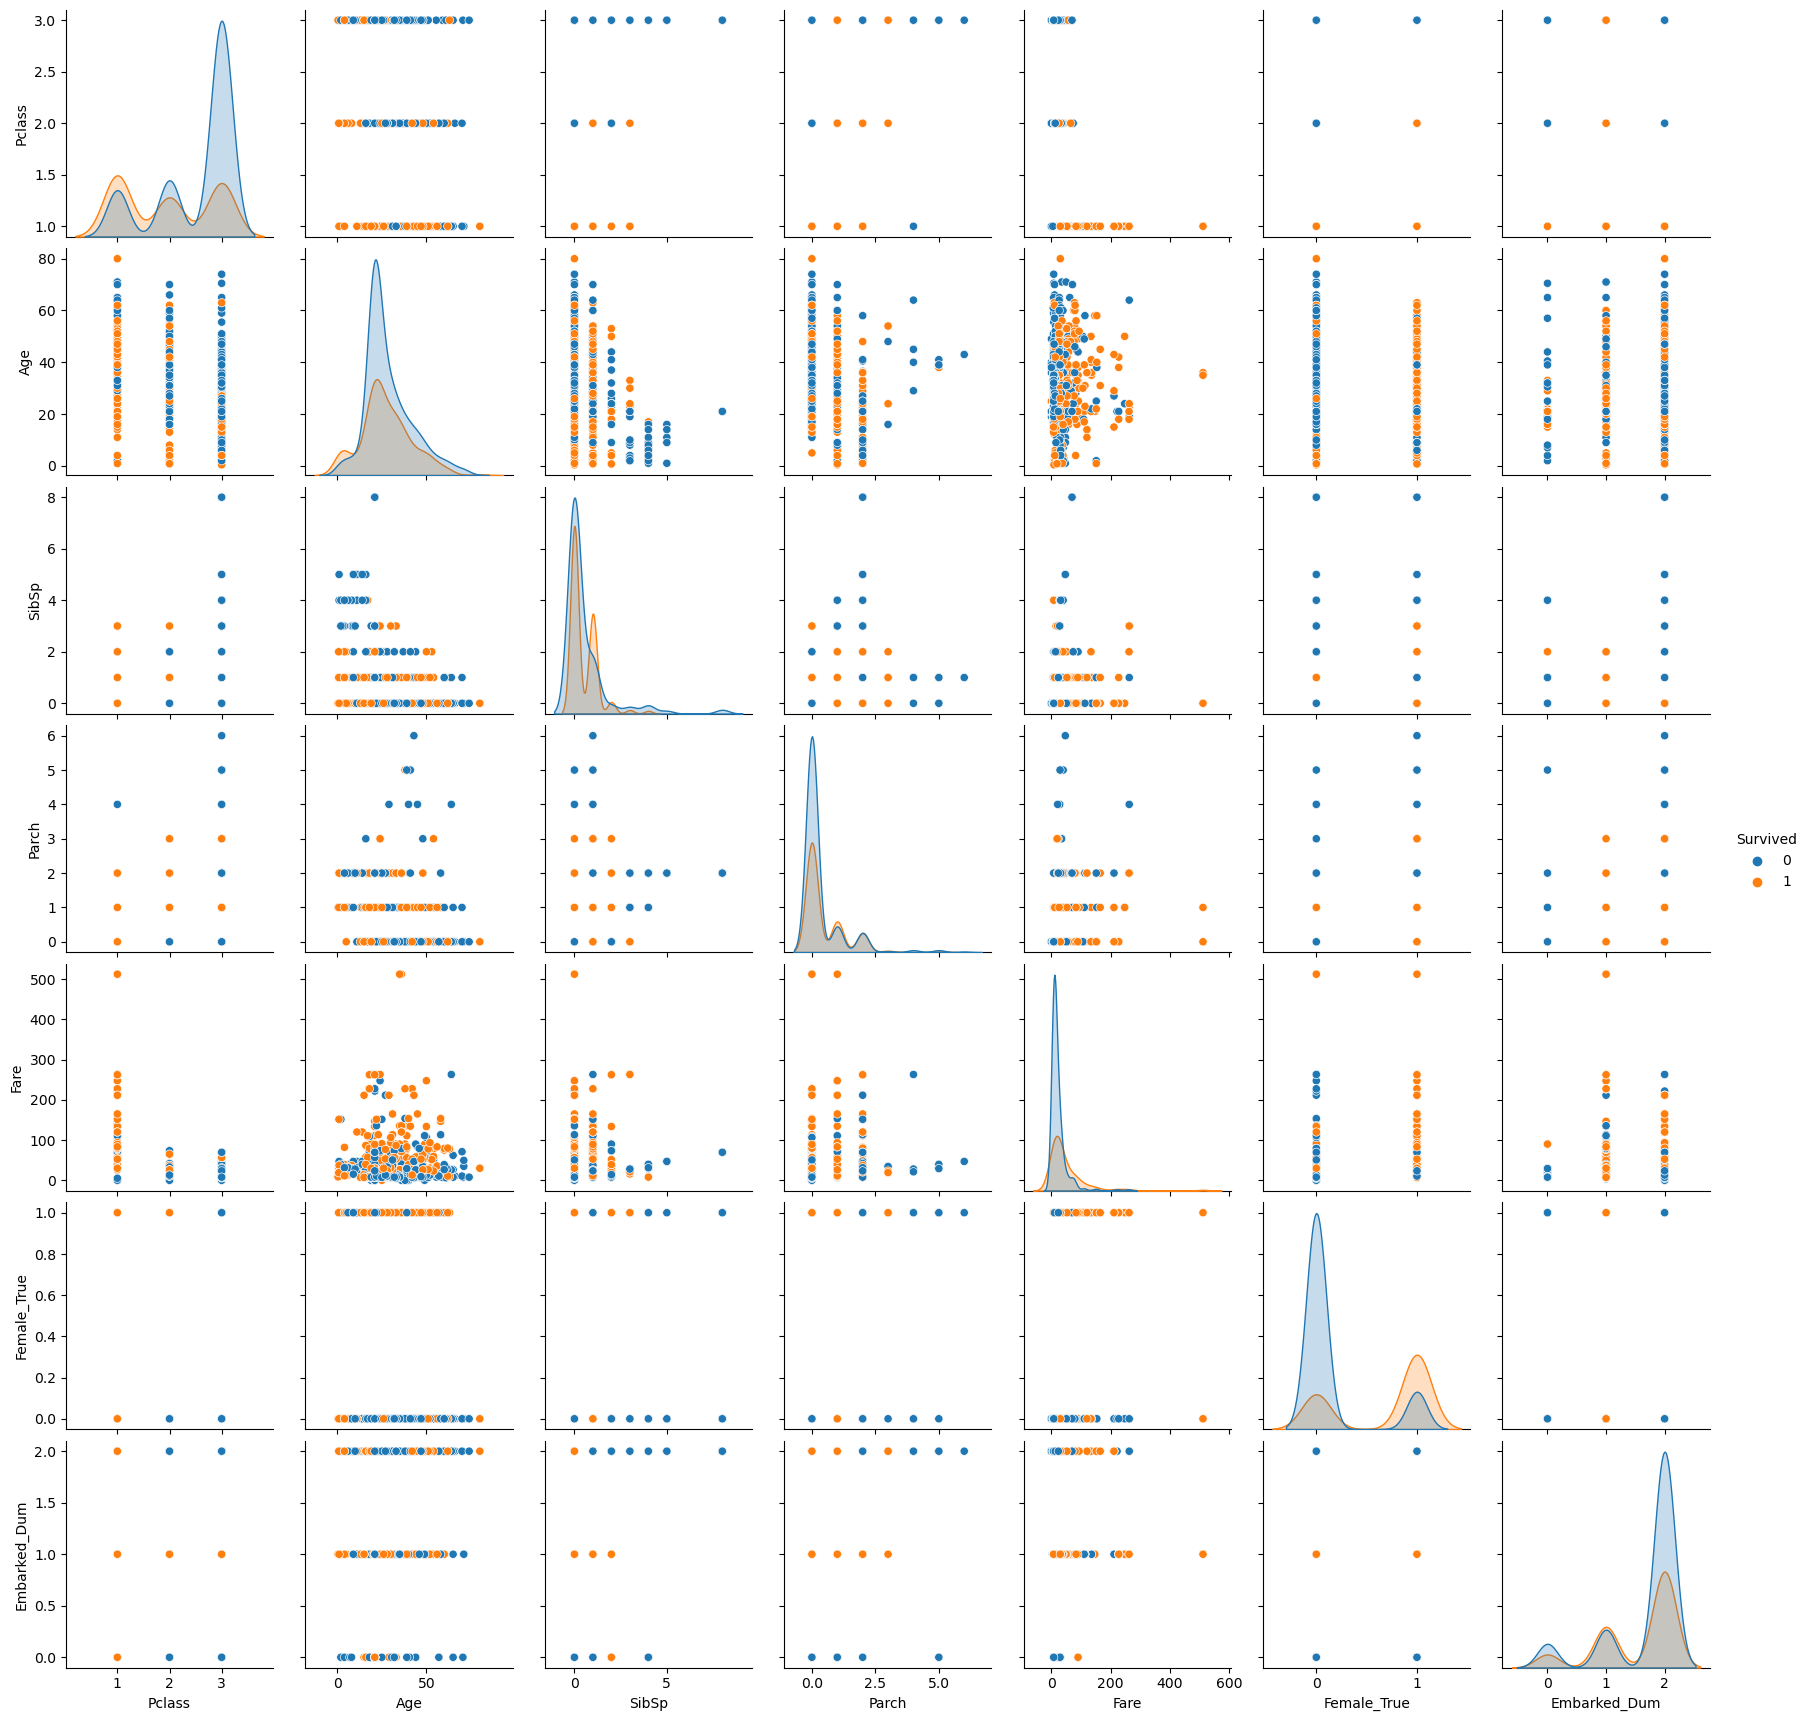

In [38]:
plt.figure(figsize=(15,7))
sns.pairplot(df_train, hue='Survived')
plt.show()

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Female_True   891 non-null    int64  
 7   Embarked_Dum  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


#  <a name="modelo">5. Treinamento do modelo</a>
[Voltar ao índice](#indice)

* separando dados entre train x test

In [40]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(columns=['Survived']), df_train['Survived'], train_size = 0.7, random_state=3)

* Treinando modelo

In [41]:
tree = DecisionTreeClassifier(max_leaf_nodes= 10, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=1)

In [42]:
y_pred = tree.predict(X_val)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [43]:
y_val

395    0
85     1
201    0
542    0
702    0
      ..
107    1
376    1
612    1
236    0
813    0
Name: Survived, Length: 268, dtype: int64

#  <a name="avaliacao">6. Avaliação do modelo</a>
[Voltar ao índice](#indice)

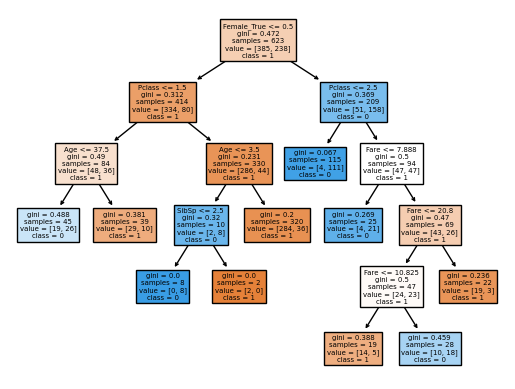

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Female_True', 'Embarked_Dum']

In [44]:
from sklearn import tree as tr
feat_n = list(df_train.drop(columns=['Survived']).columns)
tr.plot_tree(tree, feature_names=feat_n, class_names=['1', '0'], filled=True)
plt.show()
              
feat_n


In [45]:
acc = accuracy_score(y_val, y_pred)

metrics = precision_recall_fscore_support(y_val, y_pred, average='binary')
precision = metrics[0]
recall = metrics[1]
fbeta_score = metrics[2]
f1 = f1_score(y_val, y_pred, average='binary')

print(f'''
    Report
    {classification_report(y_val, y_pred)}
    Accuracy = {round(acc,2)},
    Precision = {round(precision,2)},
    Recall = {round(recall,2)},
    F-Beta = {round(fbeta_score,2)},
    F1-Score = {round(f1,2)}
''')


    Report
                  precision    recall  f1-score   support

           0       0.81      0.78      0.80       164
           1       0.67      0.71      0.69       104

    accuracy                           0.75       268
   macro avg       0.74      0.75      0.74       268
weighted avg       0.76      0.75      0.75       268

    Accuracy = 0.75,
    Precision = 0.67,
    Recall = 0.71,
    F-Beta = 0.69,
    F1-Score = 0.69



Text(113.9222222222222, 0.5, 'Predicted')

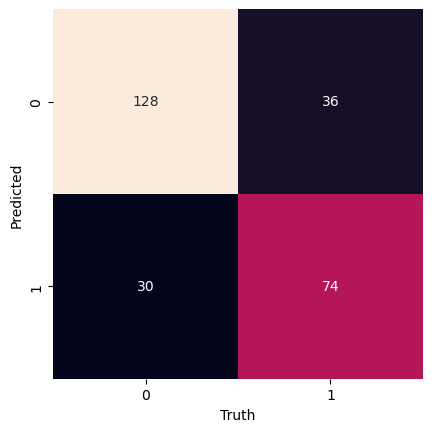

In [46]:
mat = confusion_matrix(y_val, y_pred)

names = np.unique(y_pred)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

###  Random Forest

* achando o melhor nº de depth em relação a f1-score

In [109]:
from sklearn.ensemble import RandomForestClassifier
def get_max_depth(X_train=X_train,X_val=X_val,y_val=y_val,y_train=y_train):
    max_depth = 0
    f1_scor = 0
    for depth in range(1,50):
        clf = RandomForestClassifier(random_state=3, max_depth=depth, n_estimators=100).fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        f1 = f1_score(y_val, y_pred, average='binary')
        if f1 > f1_scor:
            max_depth = depth
            f1_scor = f1
        
    return f'depth: {max_depth}, f1: {f1_scor}'

print(get_max_depth())

    

depth: 10, f1: 0.72992700729927


In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, max_depth=11).fit(X_train, y_train)
y_pred = clf.predict(X_val)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0], dtype=int64)

In [49]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       164
           1       0.75      0.75      0.75       104

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



#  <a name="aprimoramento">7. Aprimoramento do modelo</a>
[Voltar ao índice](#indice)

* analisando e removendo outliers das var_quanti

In [58]:
scale = StandardScaler()
df_train_quanti_box = pd.DataFrame(scale.fit_transform(df_train[['Age', 'Fare']])).set_axis(['Age','Fare'], axis=1)
df_train_quanti_box = pd.DataFrame(df_train_quanti_box.stack()).reset_index()
df_train_quanti_box.drop(columns=['level_0'], inplace=True)
df_train_quanti_box.rename(columns = {'level_1':'variables', 0:'standard_value'}, inplace = True)
df_train_quanti_box

,variables,standard_value
0,Age,-0.444337
1,Fare,-0.502445
2,Age,0.745434
3,Fare,0.786845
4,Age,-0.146894
...,...,...
1777,Fare,-0.176263
1778,Age,-0.146894
1779,Fare,-0.044381
1780,Age,0.299270


[Text(0.5, 0, 'Valores padronizados'),
 Text(0, 0.5, 'Variáveis'),
 Text(0.5, 1.0, 'Boxplot dias de permanência e idade padronizados')]

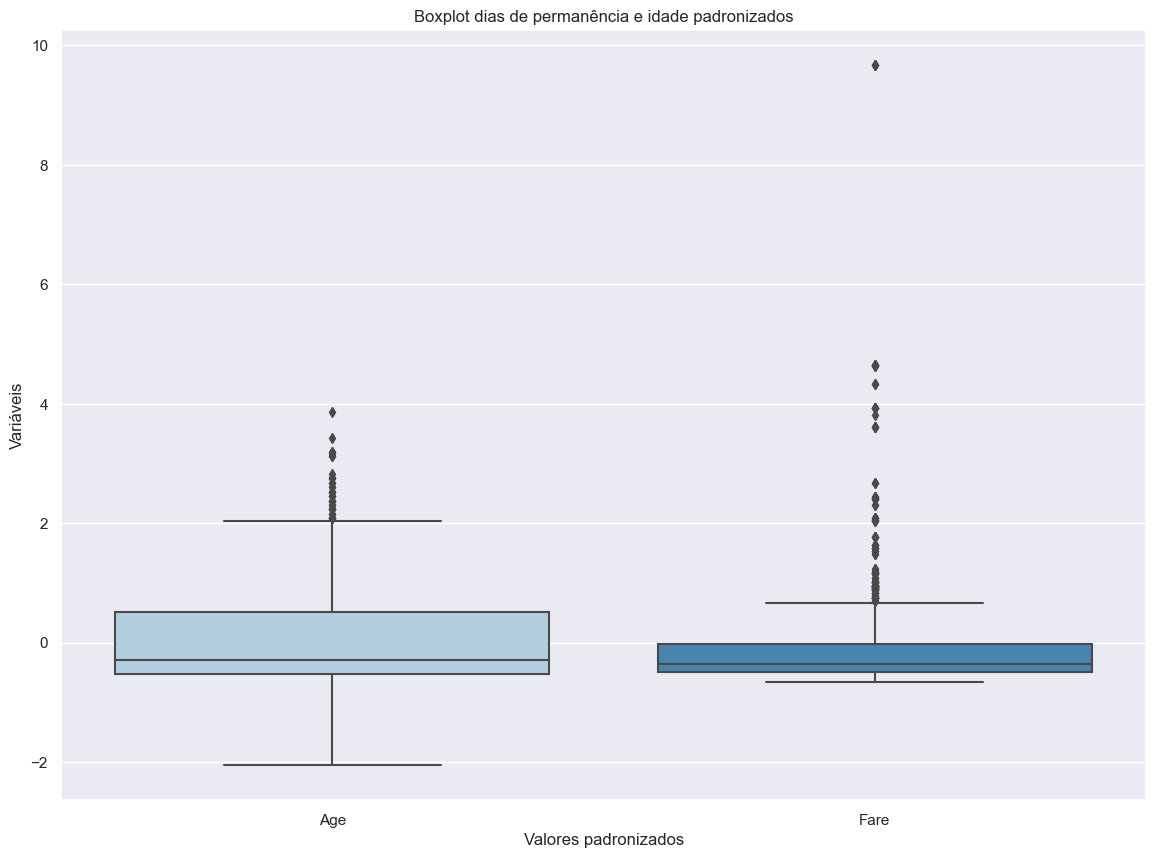

In [64]:
box = sns.boxplot(x = "variables", y = "standard_value", data = df_train_quanti_box, palette="Blues")
box.set(xlabel ="Valores padronizados", ylabel = "Variáveis", title ='Boxplot dias de permanência e idade padronizados')

In [73]:
#SELECIONANDO DADOS COM DISTRIBUIÇÃO MAIOR QUE -1.96 E MENOR QUE 1.96
df_train_outliers = pd.DataFrame(df_train[['Age', 'Fare']].stack()).reset_index()
df_train_outliers.rename(columns = {'level_1':'variables_originals', 0:'value'}, inplace = True)
df_train_outliers = pd.concat([df_train_outliers.reset_index(drop=True), df_train_quanti_box.reset_index(drop=True)], axis=1)
df_train_outliers = df_train_outliers[(df_train_outliers['standard_value'] >= -1.96) & (df_train_outliers['standard_value'] <= 1.96)]

#SELECIONANDO VALORES MÍNIMOS E MÁXIMOS 
min_values = pd.DataFrame(df_train_outliers.groupby('variables_originals')['value'].min())
max_values = pd.DataFrame(df_train_outliers.groupby('variables_originals')['value'].max())

min_values, max_values

(                     value
 variables_originals       
 Age                    2.0
 Fare                   0.0,
                      value
 variables_originals       
 Age                   54.0
 Fare                 120.0)

In [77]:
#GERANDO DATAFRAME COM REMOÇÃO DE OUTLIERS
df_train_test = df_train[(df_train['Age'] <= max_values.loc['Age', 'value']) 
                        & (df_train['Fare'] <= max_values.loc['Fare', 'value'])]
df_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      814 non-null    int64  
 1   Pclass        814 non-null    int64  
 2   Age           814 non-null    float64
 3   SibSp         814 non-null    int64  
 4   Parch         814 non-null    int64  
 5   Fare          814 non-null    float64
 6   Female_True   814 non-null    int64  
 7   Embarked_Dum  814 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 57.2 KB


Age


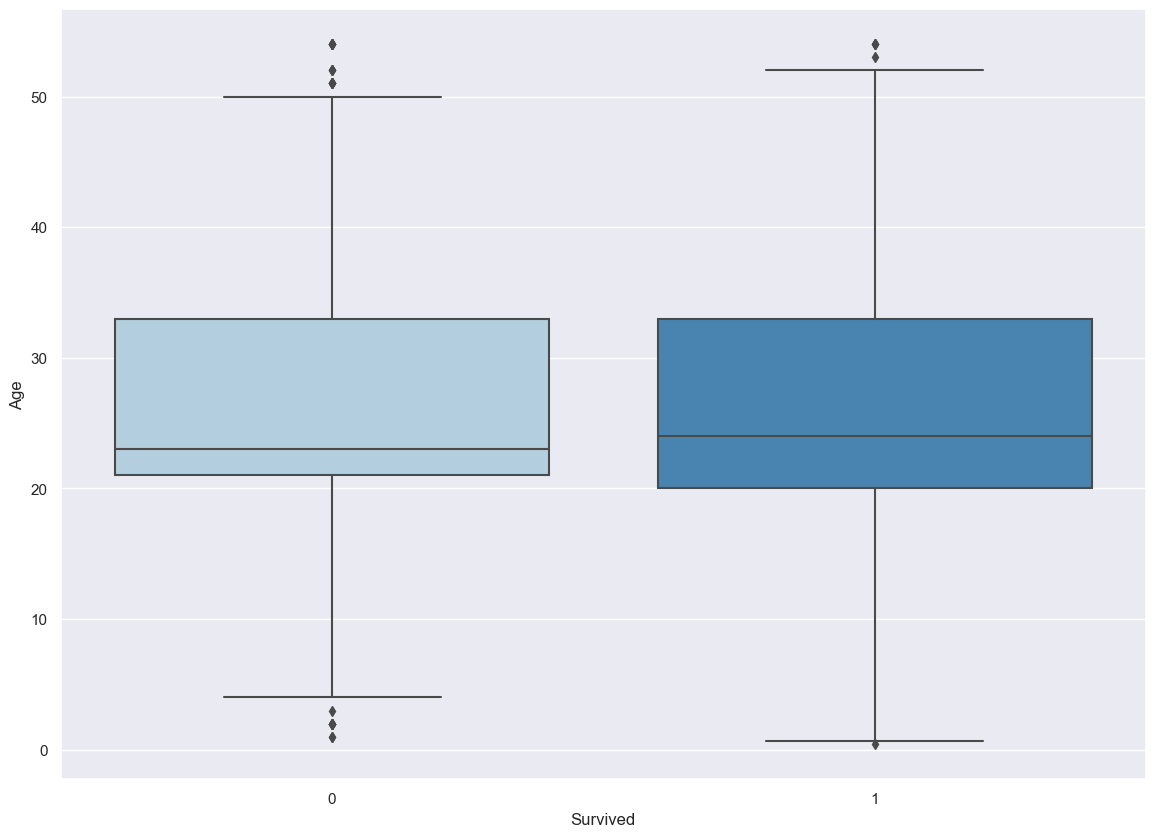

Fare


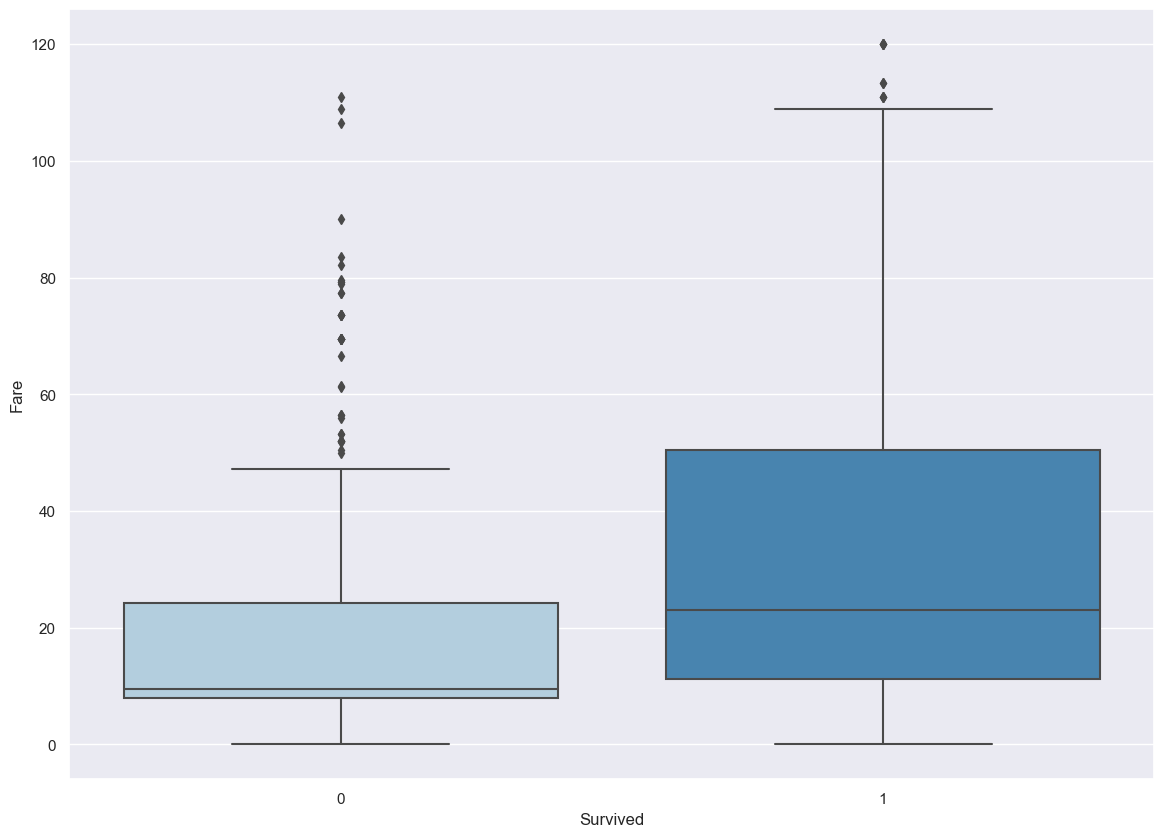

In [78]:
for var_quanti in quanti_columns:
    print(var_quanti)
    sns.boxplot(y=df_train_test[var_quanti], x='Survived', data=df_train, palette='Blues')
    plt.show()

* Nova remoção de outliers somente de "Fare"

[Text(0.5, 0, 'Valores padronizados'),
 Text(0, 0.5, 'Variáveis'),
 Text(0.5, 1.0, 'Boxplot dias de permanência e idade padronizados')]

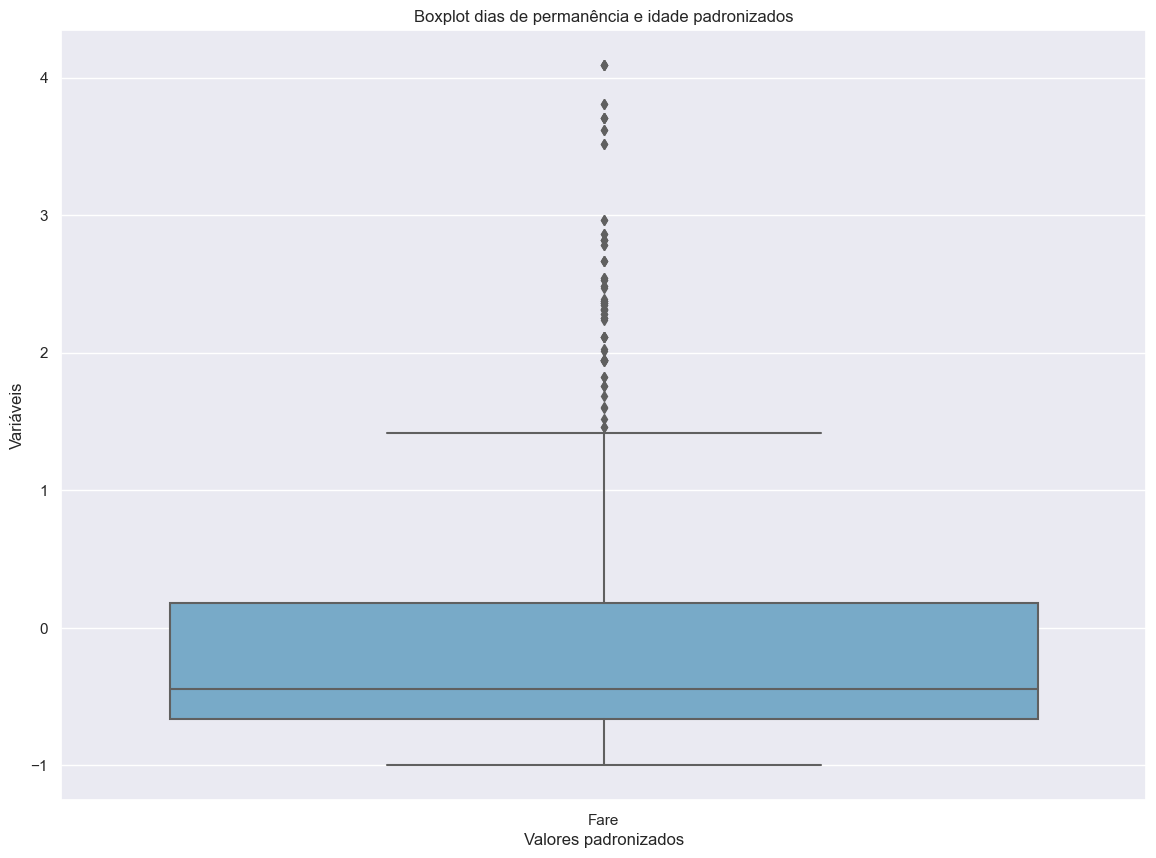

In [79]:
df_train_quanti_box = pd.DataFrame(scale.fit_transform(df_train_test[['Fare']])).set_axis(['Fare'], axis=1)
df_train_quanti_box = pd.DataFrame(df_train_quanti_box.stack()).reset_index()
df_train_quanti_box.drop(columns=['level_0'], inplace=True)
df_train_quanti_box.rename(columns = {'level_1':'variables', 0:'standard_value'}, inplace = True)
box = sns.boxplot(x = "variables", y = "standard_value", data = df_train_quanti_box, palette="Blues")
box.set(xlabel ="Valores padronizados", ylabel = "Variáveis", title ='Boxplot dias de permanência e idade padronizados')

In [80]:
#SELECIONANDO DADOS COM DISTRIBUIÇÃO MAIOR QUE -1.96 E MENOR QUE 1.96
df_train_outliers = pd.DataFrame(df_train_test[['Fare']].stack()).reset_index()
df_train_outliers.rename(columns = {'level_1':'variables_originals', 0:'value'}, inplace = True)
df_train_outliers = pd.concat([df_train_outliers.reset_index(drop=True), df_train_quanti_box.reset_index(drop=True)], axis=1)
df_train_outliers = df_train_outliers[(df_train_outliers['standard_value'] >= -1.96) & (df_train_outliers['standard_value'] <= 1.96)]

#SELECIONANDO VALORES MÍNIMOS E MÁXIMOS 
min_values = pd.DataFrame(df_train_outliers.groupby('variables_originals')['value'].min())
max_values = pd.DataFrame(df_train_outliers.groupby('variables_originals')['value'].max())

min_values, max_values

(                     value
 variables_originals       
 Fare                   0.0,
                      value
 variables_originals       
 Fare                 69.55)

In [82]:
#GERANDO DATAFRAME COM REMOÇÃO DE OUTLIERS
df_train_test = df_train_test[(df_train_test['Fare'] <= max_values.loc['Fare', 'value'])]
df_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      754 non-null    int64  
 1   Pclass        754 non-null    int64  
 2   Age           754 non-null    float64
 3   SibSp         754 non-null    int64  
 4   Parch         754 non-null    int64  
 5   Fare          754 non-null    float64
 6   Female_True   754 non-null    int64  
 7   Embarked_Dum  754 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 53.0 KB


Age


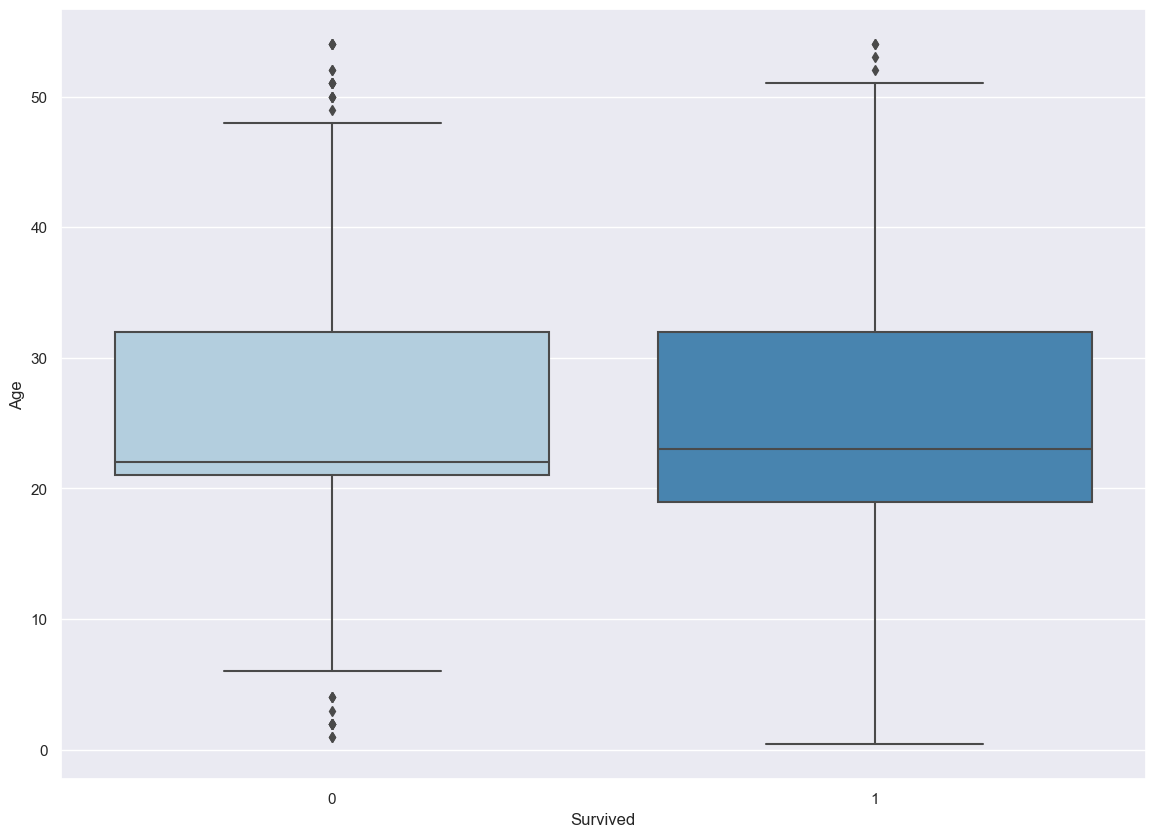

Fare


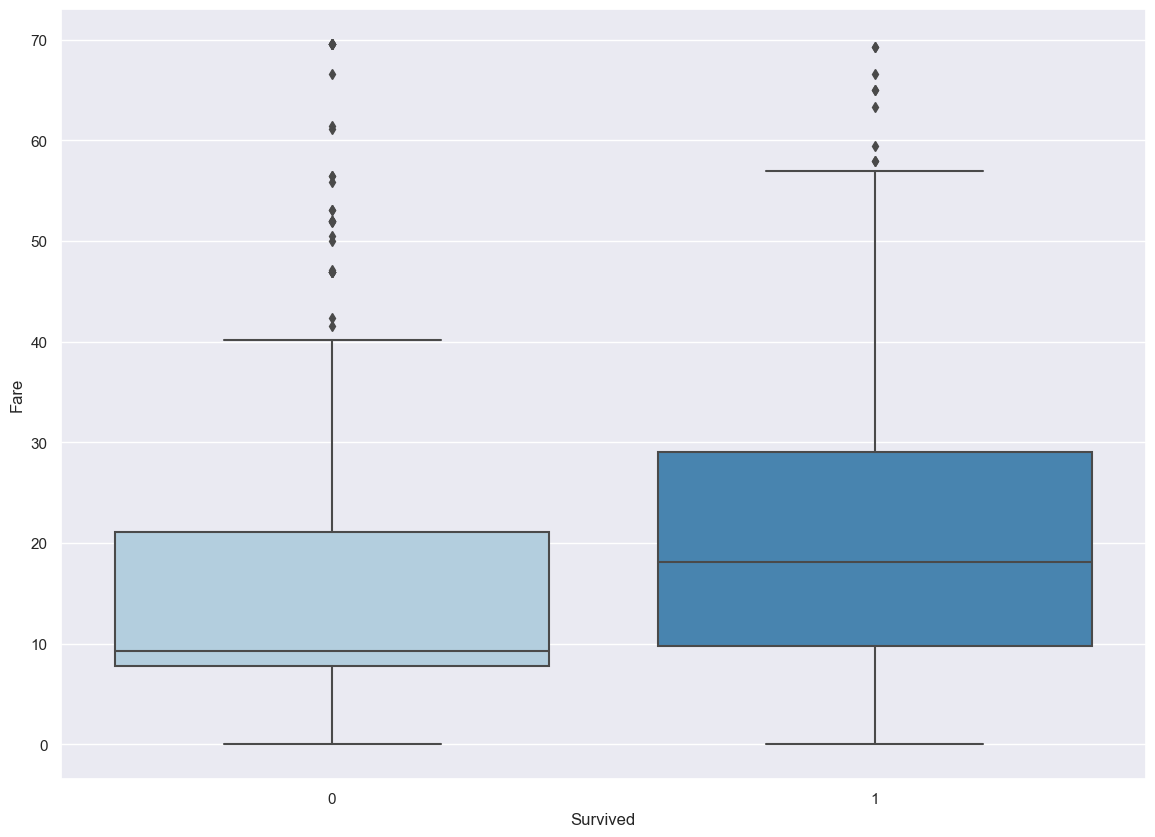

In [83]:
for var_quanti in quanti_columns:
    print(var_quanti)
    sns.boxplot(y=df_train_test[var_quanti], x='Survived', data=df_train, palette='Blues')
    plt.show()

#### Remodelagem 

In [104]:
X_train, X_val, y_train, y_val = train_test_split(df_train_test.drop(columns=['Survived']), df_train_test['Survived'], train_size = 0.7, random_state=3)

In [107]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=3, max_depth=10).fit(X_train, y_train)
y_pred = clf.predict(X_val)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [108]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       150
           1       0.83      0.65      0.73        77

    accuracy                           0.84       227
   macro avg       0.84      0.79      0.81       227
weighted avg       0.84      0.84      0.83       227



In [100]:
df_train_test['Survived'].value_counts()

0    494
1    260
Name: Survived, dtype: int64

In [113]:
X_sub = df_test.drop(columns=['PassengerId'])

y_sub = clf.predict(X_sub)
y_sub

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

* to CSV

In [122]:
sub = pd.DataFrame({
    "PassengerId": df_test['PassengerId'],
    "Survived": y_sub
})

sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [121]:
sub.to_csv('submission.csv', index=False)

#  <a name="conclusao">8. Conclusão</a>
[Voltar ao índice](#indice)